# Challenge 1

In [2]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Le fonction np.random.rand fonctionne de la même manière que la fonction numpy.random.random_sample(), nous n'avons pas trouver de différence notable, y comprit après recherche.

In [3]:
numpy.random.rand(10)

array([ 0.67706278,  0.27024182,  0.984482  ,  0.83344995,  0.7213721 ,
        0.35535145,  0.35310814,  0.97491653,  0.98723212,  0.93645831])

La fonction np.random.randn  génère des nombres centrés autours de 0 avec une variance de 1. Nous pouvons modifier la moyenne ainsi que l'écart type à l'aide de la formule$$$$
$$
\sigma*\text{npy.random.randn(N)}+\mu
$$$$$$
Fonction inutilisable dans les exercices car les nombres générés suivent une gaussienne. Nous avons besoin de nombres aléatoires générés uniformément sur l'intervalle de 0 à 1.

In [4]:
N = 10
numpy.random.randn(N)

array([-0.68346753,  1.4981233 , -0.11150837,  0.39767156,  0.0469669 ,
        0.02261304, -0.02647236, -1.05902613, -0.74161399, -0.19703092])

Nous vérifions tout de même que les nombres générés suivent bien une gaussienne de moyenne nulle et de variance unité.

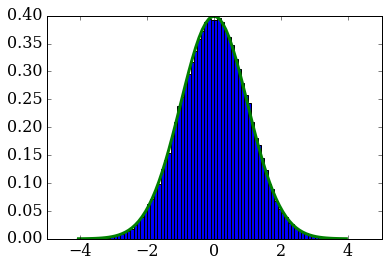

In [81]:
N = 100000
binwidth=0.1
x = numpy.random.randn(N)
bins=numpy.arange(-4.1,4.1, binwidth)
pyplot.hist(x,bins,normed='true',color='blue');

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')


La fonction random.choice est similaire à randint qui génère des entiers aléatoires ici de 0 à 10 de manière équiprobables. Nous pouvons aussi changer la probabilité de chaque entiers si on rajoute le paramètre de probabilité.

In [7]:
numpy.random.choice(10,10)

array([8, 1, 8, 6, 4, 5, 1, 9, 1, 4])

In [8]:
numpy.random.choice(10,10,p=[0,0.3,0,0,0.3,0,0,0.3,0,0.1])

array([7, 1, 4, 4, 4, 9, 9, 7, 7, 4], dtype=int64)

Ici nous modifions les probabilités afin qui les chiffres 1,4 et 9 ont 30% de chance d'apparaitre tandis que le chiffre 9 n'a que 10% de chance

In [9]:
numpy.random.choice(1000,15)/1000

array([ 0.959,  0.782,  0.641,  0.513,  0.887,  0.409,  0.502,  0.365,
        0.141,  0.613,  0.356,  0.859,  0.487,  0.166,  0.52 ])

Avec ces paramètres (1000,15) nous générons 15 entiers entre 0 et 1000. Nous divisons ces entiers par 1000 afin d'avoir des nombres aléatoire de 0 à 1 avec 3 chiffres significatifs.

Ci dessous, nous vérifions que la méthode de Von Neuman peut effectivement générer des ensembles de nombres qui suivent une distribution gaussienne.
Nous avons utiliser la fonction np.random.choice pour générer nos nolbres aléatoires uniformes. En particulier, notre quotient d'acceptation est de 0.71343, il est donc similaire à celui de l'énoncé de la leçon.

Acceptance ratio: 0.71343


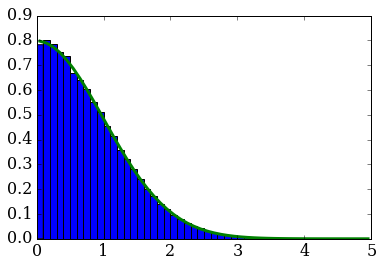

In [11]:
# Distribute g according to the exponential distribution
uniform1 = numpy.random.choice(10000000,100000)/10000000
g = numpy.log(1/(1-uniform1))

# Probabilty of drawing g according to the exponential distribution
p_g_exp = numpy.exp(-g)

# Probability of drawing g according to the (positive) normal distribution
p_g_gauss = 2.0*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi)

# Draw a second uniform distribution for the acceptance
uniform2 = numpy.random.choice(10000000,100000)/10000000

# Create acceptance mask
condition = uniform2 < p_g_gauss / (1.4*p_g_exp )

# Extract the accepted random numbers
h = numpy.extract(condition,g)

# Print the acceptance ratio
print("Acceptance ratio:",h.size/g.size)

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins,normed='true',color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')



# Challenge 2

Pour commencer, nous formulons les formules générants des paires de nombres aléatoires $z_1$ et $z_2$ à distribution normale centrée réduite (dans le cas présent: une gaussienne de moyenne de nulle et de variance unité) à partir de deux listes de nombres aléatoires uniformes $u_1$ et $u_2$. Dans notre cas, nous avons choisi d'utiliser la forme polaire de la méthode de Box-Muller.

In [98]:
def gaussian(u1,u2):
  z1 = numpy.sqrt(-2*numpy.log(u1))*numpy.cos(2*numpy.pi*u2)
  z2 = numpy.sqrt(-2*numpy.log(u1))*numpy.sin(2*numpy.pi*u2)
  return z1,z2

Ci dessous, nous exécutons les fonctions

$$z_1=\sqrt{-2\ln u_1}\cos(2\pi U_2)$$

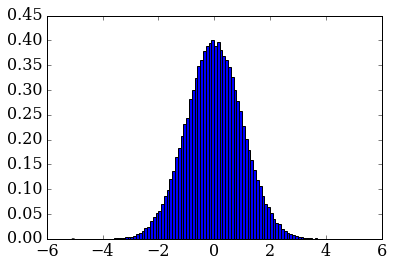

In [96]:
N = 100000
u1 = numpy.random.random_sample(N)
u2 = numpy.random.random_sample(N)
z1, z2 = gaussian(u1,u2)

binwidth=0.1
bins=numpy.arange(-5.1,5.1, binwidth)
pyplot.hist(z1,bins,normed='true',color='blue');

et $$z_2=\sqrt{-2\ln u_1}\sin(2\pi U_2)$$

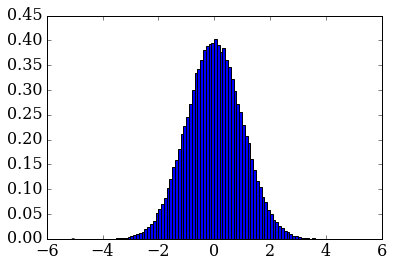

In [87]:
pyplot.hist(z2,bins,normed='true',color='blue');

Ici, nous plaçons par dessus les deux histogrammes suivants une gaussienne de moyenne nulle et d'écart type unité afin de vérifier, à l'oeil, que nous avons bien une gaussienne de paramètre correspondant.

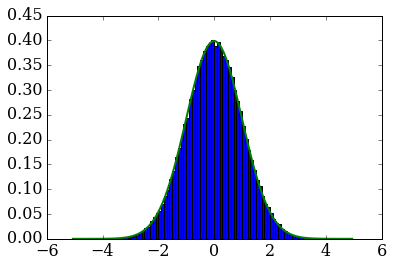

In [100]:
# Plots
binwidth=0.1
bins=numpy.arange(-5.1,5.1, binwidth)
pyplot.hist(z1,bins,normed='true',color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=2,color='green')

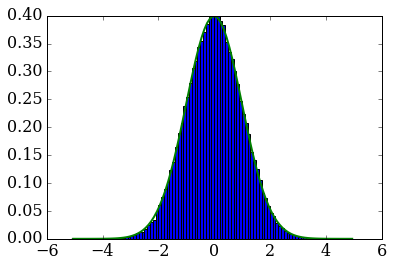

In [101]:
pyplot.hist(z2,bins,normed='true',color='blue');
pyplot.plot(xc,numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=2,color='green')

Comme attendu, la méthode de Box-Muller nous a bien généré une gausienne de moyenne nulle et de variance unité !